In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

##Assign Student ID

In [85]:
STUDENT_ID = "PES2UG23CS197"

# Automatic Assignment Based on SRN

In [86]:
def get_student_assignment(student_id):
    """
    Generate unique polynomial TYPE and architecture based on student ID
    Uses last 3 digits of student ID for assignment
    """

    last_three = int(student_id[-3:])

    poly_type = last_three % 5

    np.random.seed(last_three)

    if poly_type == 0:
        degree = 2
        a = 0
        b = np.random.uniform(0.8, 1.5)
        c = np.random.uniform(3.0, 8.0)
        d = np.random.uniform(5.0, 15.0)
        poly_desc = f"QUADRATIC: y = {b:.2f}x² + {c:.2f}x + {d:.2f}"

    elif poly_type == 1:
        degree = 3
        a = np.random.uniform(1.8, 2.5)
        b = np.random.uniform(-1.2, 0.2)
        c = np.random.uniform(3.0, 6.0)
        d = np.random.uniform(8.0, 12.0)
        poly_desc = f"CUBIC: y = {a:.2f}x³ + {b:.2f}x² + {c:.2f}x + {d:.2f}"

    elif poly_type == 2:
        degree = 4
        a = np.random.uniform(0.008, 0.02)
        b = np.random.uniform(1.5, 2.2)
        c = np.random.uniform(-1.0, 0.5)
        d = np.random.uniform(2.0, 5.0)
        e = np.random.uniform(8.0, 12.0)
        poly_desc = f"QUARTIC: y = {a:.4f}x⁴ + {b:.2f}x³ + {c:.2f}x² + {d:.2f}x + {e:.2f}"
        coefficients = (a, b, c, d, e)

    elif poly_type == 3:
        degree = "sine"
        a = np.random.uniform(1.5, 2.8)
        b = np.random.uniform(-0.8, 0.8)
        c = np.random.uniform(3.0, 6.0)
        d = np.random.uniform(8.0, 12.0)
        freq = np.random.uniform(0.02, 0.05)
        amp = np.random.uniform(5.0, 15.0)
        poly_desc = f"CUBIC + SINE: y = {a:.2f}x³ + {b:.2f}x² + {c:.2f}x + {d:.2f} + {amp:.1f}*sin({freq:.3f}x)"
        coefficients = (a, b, c, d, freq, amp)

    else:
        degree = "inverse"
        a = np.random.uniform(1.8, 2.5)
        b = np.random.uniform(-1.0, 0.5)
        c = np.random.uniform(3.0, 6.0)
        d = np.random.uniform(8.0, 12.0)
        inv_coeff = np.random.uniform(50, 200)
        poly_desc = f"CUBIC + INVERSE: y = {a:.2f}x³ + {b:.2f}x² + {c:.2f}x + {d:.2f} + {inv_coeff:.1f}/x"
        coefficients = (a, b, c, d, inv_coeff)


    if poly_type in [0, 1]:
        coefficients = (a, b, c, d)


    noise_std = np.random.uniform(1.5, 2.5)


    arch_type = last_three % 4
    architectures = {
        0: {"hidden1": 64, "hidden2": 64, "lr": 0.001, "batch_desc": "Balanced Architecture"},
        1: {"hidden1": 32, "hidden2": 72, "lr": 0.005, "batch_desc": "Narrow-to-Wide Architecture"},
        2: {"hidden1": 72, "hidden2": 32, "lr": 0.001, "batch_desc": "Wide-to-Narrow Architecture"},
        3: {"hidden1": 96, "hidden2": 96, "lr": 0.003, "batch_desc": "Large Balanced Architecture"}
    }

    return {
        "polynomial_type": poly_type,
        "degree": degree,
        "coefficients": coefficients,
        "polynomial_desc": poly_desc,
        "noise_std": noise_std,
        "architecture": architectures[arch_type],
        "student_seed": last_three
    }

# Get your assignment
assignment = get_student_assignment(STUDENT_ID)
poly_type = assignment["polynomial_type"]
degree = assignment["degree"]
coefficients = assignment["coefficients"]
noise_std = assignment["noise_std"]
hidden1 = assignment["architecture"]["hidden1"]
hidden2 = assignment["architecture"]["hidden2"]
learning_rate = assignment["architecture"]["lr"]

print("="*70)
print(f"ASSIGNMENT FOR STUDENT ID: {STUDENT_ID}")
print("="*70)
print(f"Polynomial Type: {assignment['polynomial_desc']}")
print(f"Noise Level: ε ~ N(0, {noise_std:.2f})")
print(f"Architecture: Input(1) → Hidden({hidden1}) → Hidden({hidden2}) → Output(1)")
print(f"Learning Rate: {learning_rate}")
print(f"Architecture Type: {assignment['architecture']['batch_desc']}")
print("="*70)


ASSIGNMENT FOR STUDENT ID: PES2UG23CS197
Polynomial Type: QUARTIC: y = 0.0184x⁴ + 2.05x³ + 0.46x² + 4.31x + 10.94
Noise Level: ε ~ N(0, 1.78)
Architecture: Input(1) → Hidden(32) → Hidden(72) → Output(1)
Learning Rate: 0.005
Architecture Type: Narrow-to-Wide Architecture


# Dataset Generation

In [87]:
np.random.seed(assignment["student_seed"])

n_samples = 100000
x = np.random.uniform(-100, 100, n_samples)


if poly_type == 0:
    _, b, c, d = coefficients
    y = b * x**2 + c * x + d + np.random.normal(0, noise_std, n_samples)

elif poly_type == 1:
    a, b, c, d = coefficients
    y = a * x**3 + b * x**2 + c * x + d + np.random.normal(0, noise_std, n_samples)

elif poly_type == 2:
    a, b, c, d, e = coefficients
    y = a * x**4 + b * x**3 + c * x**2 + d * x + e + np.random.normal(0, noise_std, n_samples)

elif poly_type == 3:
    a, b, c, d, freq, amp = coefficients
    y = a * x**3 + b * x**2 + c * x + d + amp * np.sin(freq * x) + np.random.normal(0, noise_std, n_samples)

else:
    a, b, c, d, inv_coeff = coefficients

    y = a * x**3 + b * x**2 + c * x + d + inv_coeff / (x + np.sign(x) * 0.1) + np.random.normal(0, noise_std, n_samples)


df = pd.DataFrame({'x': x, 'y': y})
df.to_csv('student_polynomial_dataset.csv', index=False)
print(f"Dataset with {n_samples:,} samples generated and saved!")

X = df['x'].values.reshape(-1, 1)
Y = df['y'].values.reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler_X = StandardScaler()
scaler_Y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
Y_train_scaled = scaler_Y.fit_transform(Y_train)
Y_test_scaled = scaler_Y.transform(Y_test)

print(f"Training samples: {len(X_train_scaled):,}")
print(f"Test samples: {len(X_test_scaled):,}")

Dataset with 100,000 samples generated and saved!
Training samples: 80,000
Test samples: 20,000


# Activation Functions

In [88]:
def activate_relu(inputs):
    """
    Custom ReLU activation function.
    """
    return np.maximum(0, inputs)

def gradient_relu(inputs):
    """
    Derivative of ReLU for backpropagation.
    """
    return (inputs > 0).astype(float)

# Loss Function

In [89]:
def compute_mse(actual, predicted):
    """
    Mean Squared Error calculation.
    """
    return np.mean((actual - predicted) ** 2)

# Weight Initialization - Xavier Initialization
## **Xavier (Glorot) Initialization**

When training neural networks, how we initialize weights matters.  
- If weights are **too small** → activations and gradients vanish.  
- If weights are **too large** → activations and gradients explode.  

#**Xavier initialization** (Glorot & Bengio, 2010) balances this by keeping the variance of activations roughly the same across all layers.

---

### Formula

Let:  
- **fan_in** = number of input units to a layer  
- **fan_out** = number of output units from a layer  

The variance of weights is:

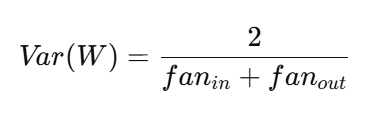


##Two common forms:  

#**Normal distribution:**  
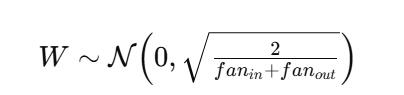

#**Uniform distribution:**  
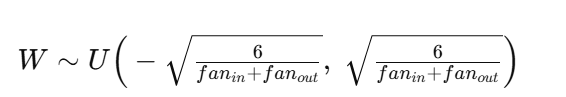

Biases are initialized to **0**.

---

### In This Assignment
- **W1 (input → hidden1):** `fan_in = input_dim`, `fan_out = hidden1`  
- **W2 (hidden1 → hidden2):** `fan_in = hidden1`, `fan_out = hidden2`  
- **W3 (hidden2 → output):** `fan_in = hidden2`, `fan_out = output_dim`  

Your task: compute the correct `xavier_std` for each layer, sample weights from a normal distribution with that std, and set biases = 0.



In [90]:
def initialize_weights_xavier(in_dim, h1_dim, h2_dim, out_dim):
    """
    Xavier initialization for weights and zero biases.
    """
    np.random.seed(assignment["student_seed"])

    std_h1 = np.sqrt(2 / (in_dim + h1_dim))
    W_h1 = np.random.normal(0, std_h1, (in_dim, h1_dim))
    b_h1 = np.zeros((1, h1_dim))

    std_h2 = np.sqrt(2 / (h1_dim + h2_dim))
    W_h2 = np.random.normal(0, std_h2, (h1_dim, h2_dim))
    b_h2 = np.zeros((1, h2_dim))

    std_out = np.sqrt(2 / (h2_dim + out_dim))
    W_out = np.random.normal(0, std_out, (h2_dim, out_dim))
    b_out = np.zeros((1, out_dim))

    return W_h1, b_h1, W_h2, b_h2, W_out, b_out

# Forward Propogation

In [91]:
def activate_relu(inputs):
    return np.maximum(0, inputs)

def propagate_forward(data_in, weights1, bias1, weights2, bias2, weights_out, bias_out):
    """
    Executes forward pass through a 3-layer neural model:
    Input → Layer1(ReLU) → Layer2(ReLU) → Output(Linear)
    """

    # First hidden layer
    pre1 = data_in @ weights1 + bias1
    act1 = activate_relu(pre1)

    # Second hidden layer
    pre2 = act1 @ weights2 + bias2
    act2 = activate_relu(pre2)

    # Output layer (no activation)
    output = act2 @ weights_out + bias_out

    return pre1, act1, pre2, act2, output

# Backward Propagation

In [92]:
def gradient_relu(inputs):
    return (inputs > 0).astype(float)

def propagate_backward(inputs, targets, pre1, act1, pre2, act2, predictions, weights2, weights3):
    """
    Backward pass for a 3-layer neural model:
    Input → Layer1(ReLU) → Layer2(ReLU) → Output(Linear)
    """

    batch_size = len(inputs)

    # Gradient of MSE loss w.r.t. predictions
    grad_output = (2 / batch_size) * (predictions - targets)

    # Output layer gradients
    grad_W3 = act2.T @ grad_output
    grad_b3 = np.sum(grad_output, axis=0, keepdims=True)

    # Gradients for second hidden layer
    grad_act2 = grad_output @ weights3.T
    grad_pre2 = grad_act2 * gradient_relu(pre2)
    grad_W2 = act1.T @ grad_pre2
    grad_b2 = np.sum(grad_pre2, axis=0, keepdims=True)

    # Gradients for first hidden layer
    grad_act1 = grad_pre2 @ weights2.T
    grad_pre1 = grad_act1 * gradient_relu(pre1)
    grad_W1 = inputs.T @ grad_pre1
    grad_b1 = np.sum(grad_pre1, axis=0, keepdims=True)

    return grad_W1, grad_b1, grad_W2, grad_b2, grad_W3, grad_b3

# Training Function

In [93]:
def optimize_model(X_train, Y_train, X_val, Y_val, max_epochs=200, halt_patience=10):
    """
    Train a 3-layer neural model with early stopping and loss tracking.
    """

    W1, b1, W2, b2, W3, b3 = initialize_weights_xavier(1, hidden1, hidden2, 1)

    lowest_val_loss = float('inf')
    optimal_weights = None
    no_improve_counter = 0

    history_train = []
    history_val = []

    print("Initiating model training...")
    print(f"Network: 1 → {hidden1} → {hidden2} → 1")
    print(f"Step Size: {learning_rate}")
    print(f"Epoch Limit: {max_epochs}, Patience Threshold: {halt_patience}")
    print("-" * 50)

    for step in range(max_epochs):
        # Forward pass on training data
        pre1, act1, pre2, act2, train_output = propagate_forward(X_train, W1, b1, W2, b2, W3, b3)

        # Compute training loss
        loss_train = compute_mse(Y_train, train_output)

        # Backward pass
        grad_W1, grad_b1, grad_W2, grad_b2, grad_W3, grad_b3 = propagate_backward(
            X_train, Y_train, pre1, act1, pre2, act2, train_output, W2, W3
        )

        # Update weights using gradient descent
        W1 -= learning_rate * grad_W1
        b1 -= learning_rate * grad_b1
        W2 -= learning_rate * grad_W2
        b2 -= learning_rate * grad_b2
        W3 -= learning_rate * grad_W3
        b3 -= learning_rate * grad_b3

        # Forward pass on validation data
        _, _, _, _, val_output = propagate_forward(X_val, W1, b1, W2, b2, W3, b3)
        loss_val = compute_mse(Y_val, val_output)

        history_train.append(loss_train)
        history_val.append(loss_val)

        if (step + 1) % 20 == 0:
            print(f"Epoch {step+1:3d}: Train Loss = {loss_train:.6f}, Validation Loss = {loss_val:.6f}")

        # Early stopping logic
        if loss_val < lowest_val_loss:
            lowest_val_loss = loss_val
            optimal_weights = (W1.copy(), b1.copy(), W2.copy(), b2.copy(), W3.copy(), b3.copy())
            no_improve_counter = 0
        else:
            no_improve_counter += 1

        if no_improve_counter >= halt_patience:
            print(f"Early stopping activated at epoch {step+1}")
            print(f"Lowest validation loss: {lowest_val_loss:.6f}")
            break

    return optimal_weights, history_train, history_val

# Execute Training

In [94]:
print("Launching model training with your personalized setup...")
final_weights, loss_history_train, loss_history_val = optimize_model(
    X_train_scaled, Y_train_scaled, X_test_scaled, Y_test_scaled,
    max_epochs=500, halt_patience=10
)

Launching model training with your personalized setup...
Initiating model training...
Network: 1 → 32 → 72 → 1
Step Size: 0.005
Epoch Limit: 500, Patience Threshold: 10
--------------------------------------------------
Epoch  20: Train Loss = 0.736429, Validation Loss = 0.727005
Epoch  40: Train Loss = 0.539925, Validation Loss = 0.532779
Epoch  60: Train Loss = 0.422675, Validation Loss = 0.416472
Epoch  80: Train Loss = 0.348974, Validation Loss = 0.343556
Epoch 100: Train Loss = 0.304191, Validation Loss = 0.299094
Epoch 120: Train Loss = 0.273817, Validation Loss = 0.268857
Epoch 140: Train Loss = 0.252500, Validation Loss = 0.247696
Epoch 160: Train Loss = 0.236410, Validation Loss = 0.231639
Epoch 180: Train Loss = 0.222524, Validation Loss = 0.217775
Epoch 200: Train Loss = 0.209610, Validation Loss = 0.204975
Epoch 220: Train Loss = 0.198988, Validation Loss = 0.194523
Epoch 240: Train Loss = 0.190935, Validation Loss = 0.186563
Epoch 260: Train Loss = 0.183715, Validation Los

# Results Visualization

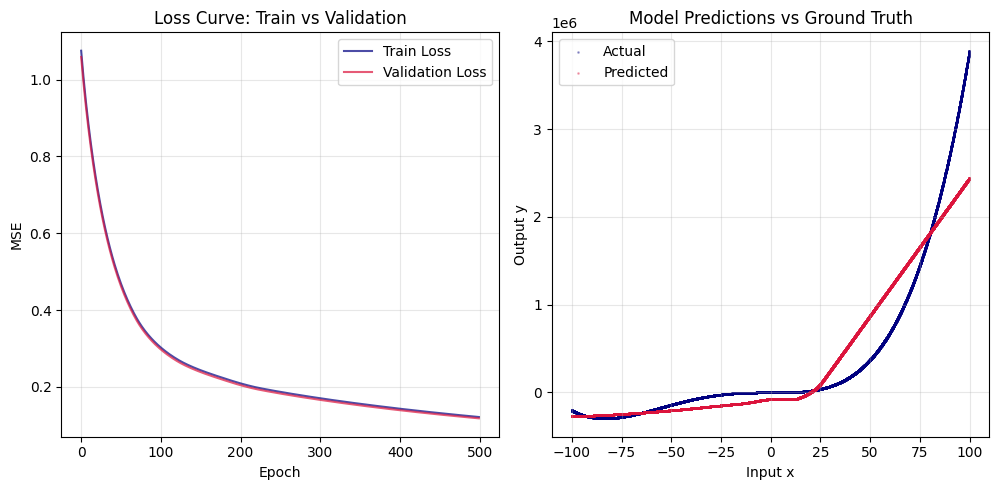

In [95]:
# Visualize training performance
plt.figure(figsize=(15, 5))

# Plot loss progression
plt.subplot(1, 3, 1)
plt.plot(loss_history_train, label='Train Loss', color='navy', alpha=0.7)
plt.plot(loss_history_val, label='Validation Loss', color='crimson', alpha=0.7)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Loss Curve: Train vs Validation')
plt.legend()
plt.grid(True, alpha=0.3)

# Final predictions using best weights
W1_final, b1_final, W2_final, b2_final, W3_final, b3_final = final_weights
_, _, _, _, scaled_preds = propagate_forward(X_test_scaled, W1_final, b1_final, W2_final, b2_final, W3_final, b3_final)

# Convert predictions and targets back to original scale
actual_y = scaler_Y.inverse_transform(Y_test_scaled)
predicted_y = scaler_Y.inverse_transform(scaled_preds)
original_x = scaler_X.inverse_transform(X_test_scaled)

# Compare predictions to actual values
plt.subplot(1, 3, 2)
plt.scatter(original_x, actual_y, s=1, alpha=0.3, label='Actual', color='navy')
plt.scatter(original_x, predicted_y, s=1, alpha=0.3, label='Predicted', color='crimson')
plt.xlabel('Input x')
plt.ylabel('Output y')
plt.title('Model Predictions vs Ground Truth')
plt.legend()
plt.grid(True, alpha=0.3)

# Optional: Residual plot
# plt.subplot(1, 3, 3)
# residuals = actual_y.flatten() - predicted_y.flatten()
# plt.scatter(original_x, residuals, s=1, alpha=0.3, color='darkgreen')
# plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
# plt.xlabel('Input x')
# plt.ylabel('Residuals')
# plt.title('Residuals: Actual - Predicted')
# plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Specific Prediction Test

In [96]:
test_input_value = 90.2
new_input = np.array([[test_input_value]])
new_input_scaled = scaler_X.transform(new_input)

_, _, _, _, scaled_output = propagate_forward(new_input_scaled, W1, b1, W2, b2, W3, b3)
predicted_output = scaler_Y.inverse_transform(scaled_output)

# Compute ground truth using original polynomial
if poly_type == 0:
    _, b, c, d = coefficients
    true_output = b * test_input_value**2 + c * test_input_value + d

elif poly_type == 1:
    a, b, c, d = coefficients
    true_output = a * test_input_value**3 + b * test_input_value**2 + c * test_input_value + d

elif poly_type == 2:
    a, b, c, d, e = coefficients
    true_output = a * test_input_value**4 + b * test_input_value**3 + c * test_input_value**2 + d * test_input_value + e

elif poly_type == 3:
    a, b, c, d, freq, amp = coefficients
    true_output = a * test_input_value**3 + b * test_input_value**2 + c * test_input_value + d + amp * np.sin(freq * test_input_value)

else:
    a, b, c, d, inv_coeff = coefficients
    true_output = a * test_input_value**3 + b * test_input_value**2 + c * test_input_value + d + inv_coeff / (test_input_value + np.sign(test_input_value) * 0.1)

# Display results
print("\n" + "=" * 60)
print(f"RESULTS FOR INPUT x = {test_input_value}")
print("=" * 60)
print(f"Predicted by Model:        {predicted_output[0][0]:,.2f}")
print(f"Actual (Analytical):       {true_output:,.2f}")
print(f"Absolute Error:            {abs(predicted_output[0][0] - true_output):,.2f}")
print(f"Relative Error:            {abs(predicted_output[0][0] - true_output) / abs(true_output) * 100:.3f}%")


RESULTS FOR INPUT x = 90.2
Predicted by Model:        2,134,959.52
Actual (Analytical):       2,727,069.03
Absolute Error:            592,109.51
Relative Error:            21.712%


# Performance Metrics

In [97]:
# Evaluate final metrics
last_train_error = loss_history_train[-1] if loss_history_train else float('inf')
last_val_error = loss_history_val[-1] if loss_history_val else float('inf')

# Compute R² score
mean_actual = np.mean(actual_y)
residual_sum = np.sum((actual_y - predicted_y) ** 2)
total_sum = np.sum((actual_y - mean_actual) ** 2)
r2_metric = 1 - (residual_sum / total_sum)

# Display summary
print("\n" + "=" * 60)
print("MODEL PERFORMANCE OVERVIEW")
print("=" * 60)
print(f"Final Training Error: {last_train_error:.6f}")
print(f"Final Validation Error: {last_val_error:.6f}")
print(f"R² Coefficient:         {r2_metric:.4f}")
print(f"Epochs Completed:       {len(loss_history_train)}")


MODEL PERFORMANCE OVERVIEW
Final Training Error: 0.121515
Final Validation Error: 0.118058
R² Coefficient:         0.8829
Epochs Completed:       500
